# Predict Bike Sharing Demand with AutoGluon Template

## Project: Predict Bike Sharing Demand with AutoGluon
This notebook is a template with each step that you need to complete for the project.

Please fill in your code where there are explicit `?` markers in the notebook. You are welcome to add more cells and code as you see fit.

Once you have completed all the code implementations, please export your notebook as a HTML file so the reviews can view your code. Make sure you have all outputs correctly outputted.

`File-> Export Notebook As... -> Export Notebook as HTML`

There is a writeup to complete as well after all code implememtation is done. Please answer all questions and attach the necessary tables and charts. You can complete the writeup in either markdown or PDF.

Completing the code template and writeup template will cover all of the rubric points for this project.

The rubric contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this notebook and also discuss the results in the writeup file.

## Step 1: Create an account with Kaggle

## Step 2: Download the Kaggle dataset using the kaggle python library

### Open up Sagemaker Studio and use starter template

1. Notebook should be using a `ml.t3.medium` instance (2 vCPU + 4 GiB)
2. Notebook should be using kernal: `Python 3 (MXNet 1.8 Python 3.7 CPU Optimized)`

### Install packages

In [1]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0" bokeh==2.0.1
!pip install autogluon --no-cache-dir
# Without --no-cache-dir, smaller aws instances may have trouble installing

  Using cached pip-24.0-py3-none-any.whl.metadata (3.6 kB)
Using cached pip-24.0-py3-none-any.whl (2.1 MB)
  Attempting uninstall: pip
    Found existing installation: pip 23.3.2
    Uninstalling pip-23.3.2:
      Successfully uninstalled pip-23.3.2
  Using cached setuptools-69.5.1-py3-none-any.whl.metadata (6.2 kB)
Using cached setuptools-69.5.1-py3-none-any.whl (894 kB)
  Attempting uninstall: setuptools
    Found existing installation: setuptools 69.2.0
    Uninstalling setuptools-69.2.0:
      Successfully uninstalled setuptools-69.2.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dash 2.16.1 requires dash-core-components==2.0.0, which is not installed.
dash 2.16.1 requires dash-html-components==2.0.0, which is not installed.
dash 2.16.1 requires dash-table==5.0.0, which is not installed.
  Using cached mxnet-1.9.1-py3-none-manylinux2014_x86_64.whl.metada

### Setup Kaggle API Key

In [15]:
# create the .kaggle directory and an empty kaggle.json file
!sudo mkdir -p /root/.kaggle
!sudo touch /root/.kaggle/kaggle.json
!sudo chmod 600 /root/.kaggle/kaggle.json

In [ ]:
# Fill in your user name and key from creating the kaggle account and API token file
import json
kaggle_username = "xxxxx"
kaggle_key = "xxxxxx"

# Save API token the kaggle.json file
with open('/.kaggle/kaggle.json', "w") as f:
    f.write(json.dumps({"username": kaggle_username, "key": kaggle_key}))

### Download and explore dataset

### Go to the bike sharing demand competition and agree to the terms
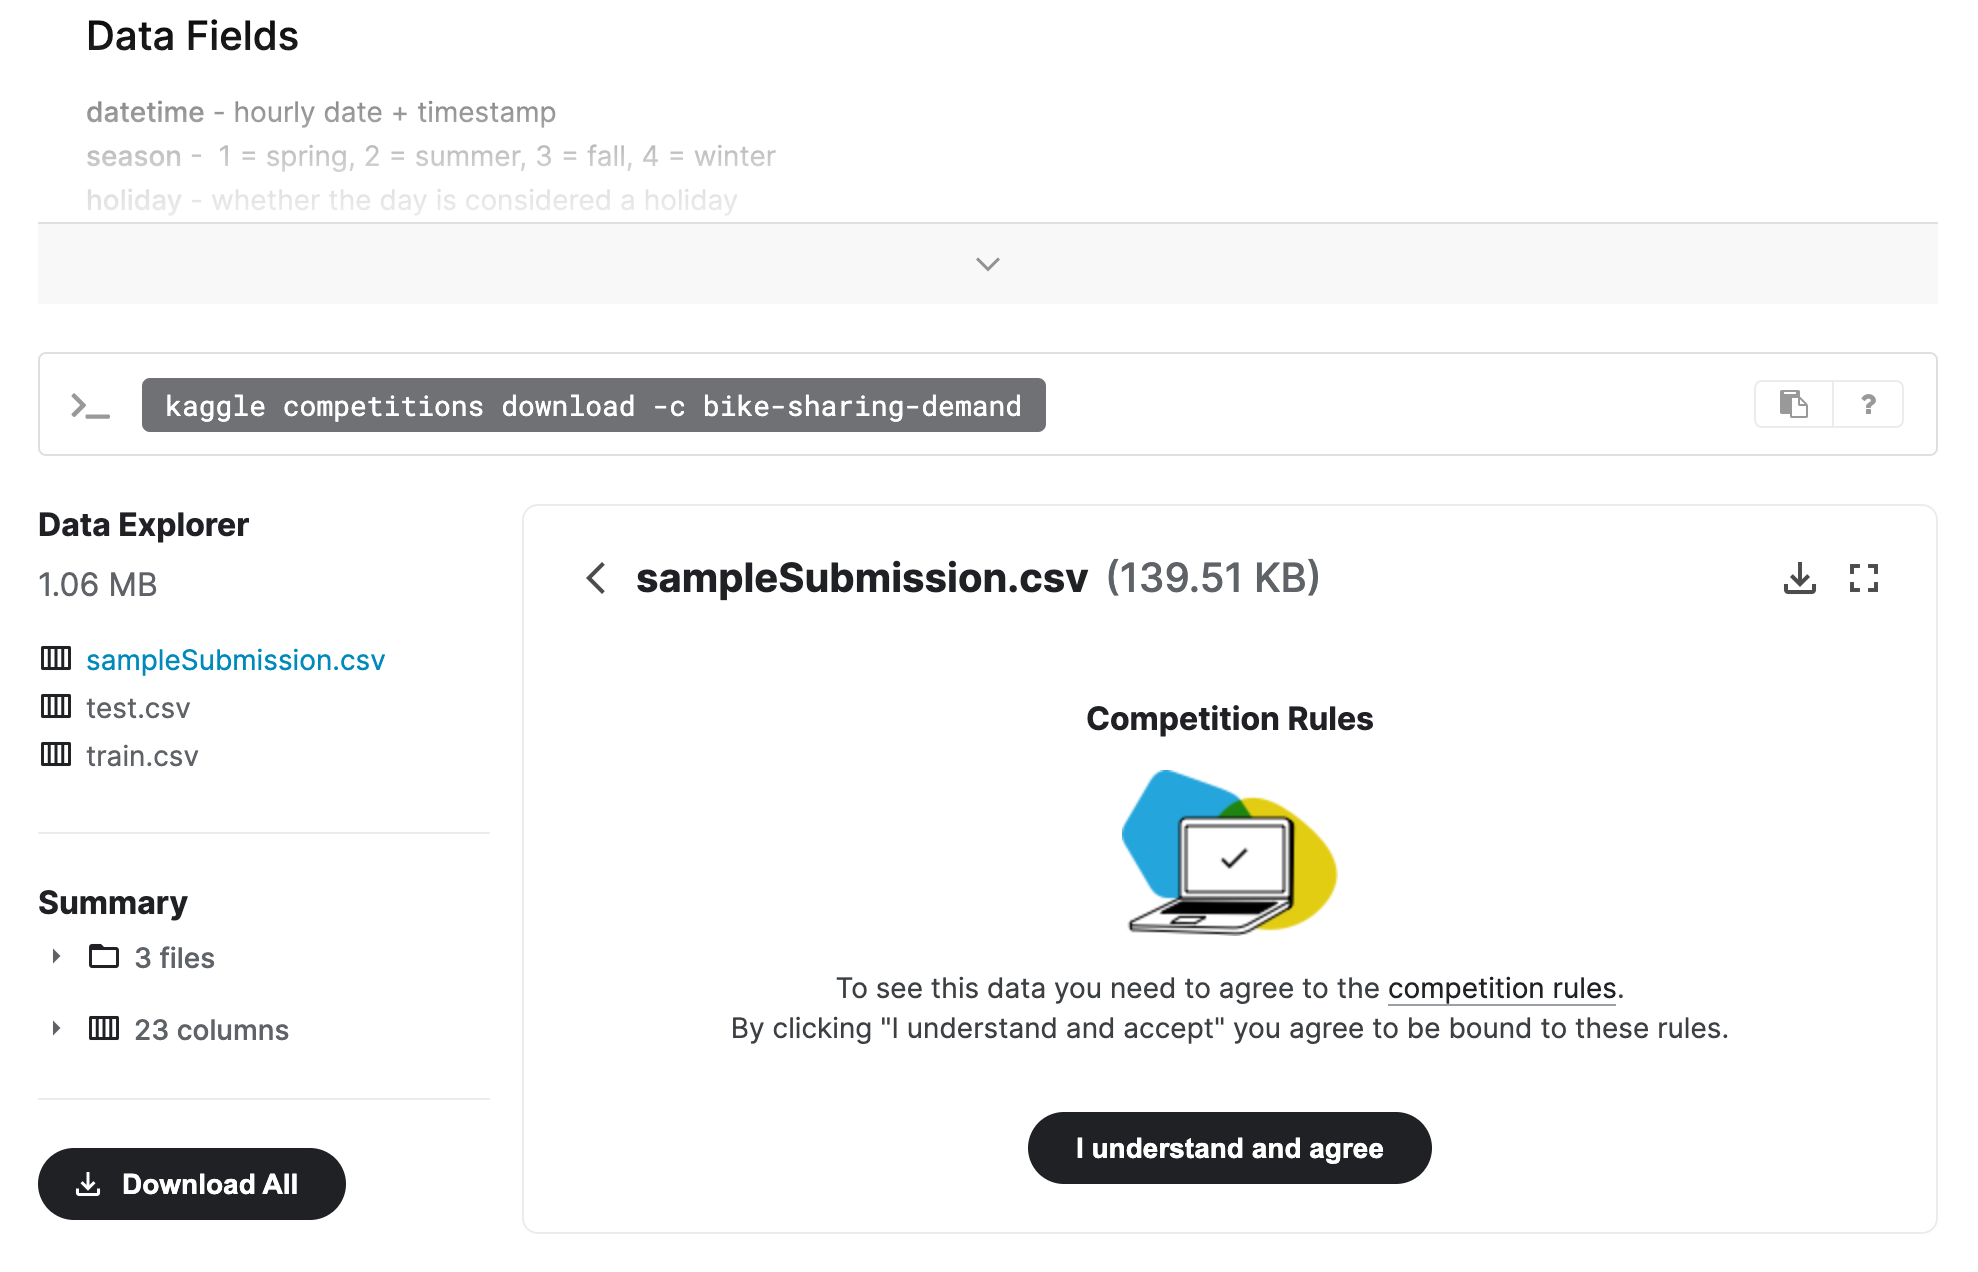

In [2]:
!pip install kaggle

  Using cached kaggle-1.6.12-py3-none-any.whl


In [3]:
!chmod 600 /home/sagemaker-user/.kaggle/kaggle.json

In [4]:
# Download the dataset, it will be in a .zip file so you'll need to unzip it as well.
!kaggle competitions download -c bike-sharing-demand
# If you already downloaded it you can use the -o command to overwrite the file
!unzip -o bike-sharing-demand.zip

bike-sharing-demand.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  bike-sharing-demand.zip
  inflating: sampleSubmission.csv    
  inflating: test.csv                
  inflating: train.csv               


In [1]:
import pandas as pd
from autogluon.tabular import TabularPredictor

In [2]:
# Create the train dataset in pandas by reading the csv
# Set the parsing of the datetime column so you can use some of the `dt` features in pandas later
train = pd.read_csv('train.csv', parse_dates=['datetime'])
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [3]:
# Simple output of the train dataset to view some of the min/max/varition of the dataset features.
train.describe()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2011-12-27 05:56:22.399411968,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
min,2011-01-01 00:00:00,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-02 07:15:00,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,2012-01-01 20:30:00,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,2012-07-01 12:45:00,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,2012-12-19 23:00:00,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000
std,NaN,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454


In [4]:
# Create the test pandas dataframe in pandas by reading the csv, remember to parse the datetime!
test = pd.read_csv(r'/home/sagemaker-user/cd0385-project-starter/project/test.csv', parse_dates=['datetime'])
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [5]:
# Same thing as train and test dataset
submission = pd.read_csv(r'/home/sagemaker-user/cd0385-project-starter/project/sampleSubmission.csv', parse_dates=['datetime'])
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


## Step 3: Train a model using AutoGluon’s Tabular Prediction

Requirements:
* We are prediting `count`, so it is the label we are setting.
* Ignore `casual` and `registered` columns as they are also not present in the test dataset. 
* Use the `root_mean_squared_error` as the metric to use for evaluation.
* Set a time limit of 10 minutes (600 seconds).
* Use the preset `best_quality` to focus on creating the best model.

In [6]:
predictor = TabularPredictor(label='count', eval_metric='root_mean_squared_error').fit(train.drop(columns=['casual' , 'registered'], axis=1), time_limit=600, presets='best_quality', auto_stack=False)

No path specified. Models will be saved in: "AutogluonModels/ag-20240510_092024"
Presets specified: ['best_quality']
/opt/conda/lib/python3.10/site-packages/autogluon/core/utils/utils.py:564: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context("mode.use_inf_as_na", True):  # treat None, NaN, INF, NINF as NA
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20240510_092024"
AutoGluon Version:  0.8.2
Python Version:     3.10.14
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Sat Mar 23 09:49:55 UTC 2024
Disk Space Avail:   4.44 GB / 5.36 GB (82.8%)
	We recommend a minimum available disk space of 10 GB, and large datasets may require more.
Train Data Rows:    10886
Train Data Columns: 9
Label Column: count
Preprocessing data ...
/opt/conda/lib/python3.10/site-packages/autogluon/core/utils/util

[1000]	valid_set's rmse: 136.065


	-135.958	 = Validation score   (-root_mean_squared_error)
	2.71s	 = Training   runtime
	0.15s	 = Validation runtime
Fitting model: LightGBM ... Training model for up to 593.95s of the 593.95s of remaining time.
	-134.0804	 = Validation score   (-root_mean_squared_error)
	1.1s	 = Training   runtime
	0.08s	 = Validation runtime
Fitting model: RandomForestMSE ... Training model for up to 592.64s of the 592.64s of remaining time.
	-122.0128	 = Validation score   (-root_mean_squared_error)
	12.66s	 = Training   runtime
	0.15s	 = Validation runtime
Fitting model: CatBoost ... Training model for up to 579.57s of the 579.57s of remaining time.
	-134.2362	 = Validation score   (-root_mean_squared_error)
	6.28s	 = Training   runtime
	0.0s	 = Validation runtime
Fitting model: ExtraTreesMSE ... Training model for up to 573.28s of the 573.28s of remaining time.
	-128.4294	 = Validation score   (-root_mean_squared_error)
	7.42s	 = Training   runtime
	0.18s	 = Validation runtime
Fitting model: Neura

### Review AutoGluon's training run with ranking of models that did the best.

In [7]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                  model   score_val  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0        KNeighborsDist  -92.442085       0.016874   0.024408                0.016874           0.024408            1       True          2
1   WeightedEnsemble_L2  -92.442085       0.017564   0.412167                0.000690           0.387760            2       True         12
2        KNeighborsUnif -109.739422       0.018126   2.728556                0.018126           2.728556            1       True          1
3       RandomForestMSE -122.012844       0.146433  12.661844                0.146433          12.661844            1       True          5
4         ExtraTreesMSE -128.429416       0.184696   7.424402                0.184696           7.424402            1       True          7
5         LightGBMLarge -132.173561       0.026047   1.716424                0.026047           1.

/opt/conda/lib/python3.10/site-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif': 'KNNModel',
  'KNeighborsDist': 'KNNModel',
  'LightGBMXT': 'LGBModel',
  'LightGBM': 'LGBModel',
  'RandomForestMSE': 'RFModel',
  'CatBoost': 'CatBoostModel',
  'ExtraTreesMSE': 'XTModel',
  'NeuralNetFastAI': 'NNFastAiTabularModel',
  'XGBoost': 'XGBoostModel',
  'NeuralNetTorch': 'TabularNeuralNetTorchModel',
  'LightGBMLarge': 'LGBModel',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif': -109.73942190555698,
  'KNeighborsDist': -92.44208479870365,
  'LightGBMXT': -135.95803375936984,
  'LightGBM': -134.0804268849742,
  'RandomForestMSE': -122.01284447953923,
  'CatBoost': -134.23616330181272,
  'ExtraTreesMSE': -128.42941608551303,
  'NeuralNetFastAI': -136.5149023826015,
  'XGBoost': -135.0750870521187,
  'NeuralNetTorch': -140.02270087878156,
  'LightGBMLarge': -132.1735605846617,
  'WeightedEnsemble_L2': -92.44208479870365},
 'model_best': 'WeightedEnsemble_L2',
 'model_paths': {'KNeighborsUnif': ['KNe

### Create predictions from test dataset

In [8]:
predictions = predictor.predict(test)
predictions.head()

0    51.861626
1    56.686295
2    59.077763
3    60.468830
4    61.419930
Name: count, dtype: float32

#### NOTE: Kaggle will reject the submission if we don't set everything to be > 0.

In [9]:
# Describe the `predictions` series to see if there are any negative values
predictions.describe()

count    6493.000000
mean      135.819412
std       132.525269
min         3.424214
25%        23.827692
50%        71.032265
75%       203.938919
max       537.853882
Name: count, dtype: float64

In [10]:
# How many negative values do we have?
0

0

No predictions found to be negative

### Set predictions to submission dataframe, save, and submit

In [11]:
submission["count"] = predictions
submission.to_csv("submission.csv", index=False)

In [12]:
!kaggle competitions submit -c bike-sharing-demand -f submission.csv -m "first raw submission"

100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 687kB/s]
Successfully submitted to Bike Sharing Demand

#### View submission via the command line or in the web browser under the competition's page - `My Submissions`

In [13]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                        status    publicScore  privateScore  
---------------------------  -------------------  ---------------------------------  --------  -----------  ------------  
submission.csv               2024-05-10 09:21:56  first raw submission               pending                              
submission_new_hpo.csv       2024-05-10 08:42:32  new features with hyperparameters  complete  0.5198       0.5198        
submission_new_features.csv  2024-05-10 08:36:17  new features                       complete  0.51296      0.51296       
submission.csv               2024-05-10 08:29:53  first raw submission               complete  1.86412      1.86412       


#### Initial score of `1.86412`

## Step 4: Exploratory Data Analysis and Creating an additional feature
* Any additional feature will do, but a great suggestion would be to separate out the datetime into hour, day, or month parts.

array([[<Axes: title={'center': 'datetime'}>,
        <Axes: title={'center': 'season'}>,
        <Axes: title={'center': 'holiday'}>],
       [<Axes: title={'center': 'workingday'}>,
        <Axes: title={'center': 'weather'}>,
        <Axes: title={'center': 'temp'}>],
       [<Axes: title={'center': 'atemp'}>,
        <Axes: title={'center': 'humidity'}>,
        <Axes: title={'center': 'windspeed'}>],
       [<Axes: title={'center': 'casual'}>,
        <Axes: title={'center': 'registered'}>,
        <Axes: title={'center': 'count'}>]], dtype=object)

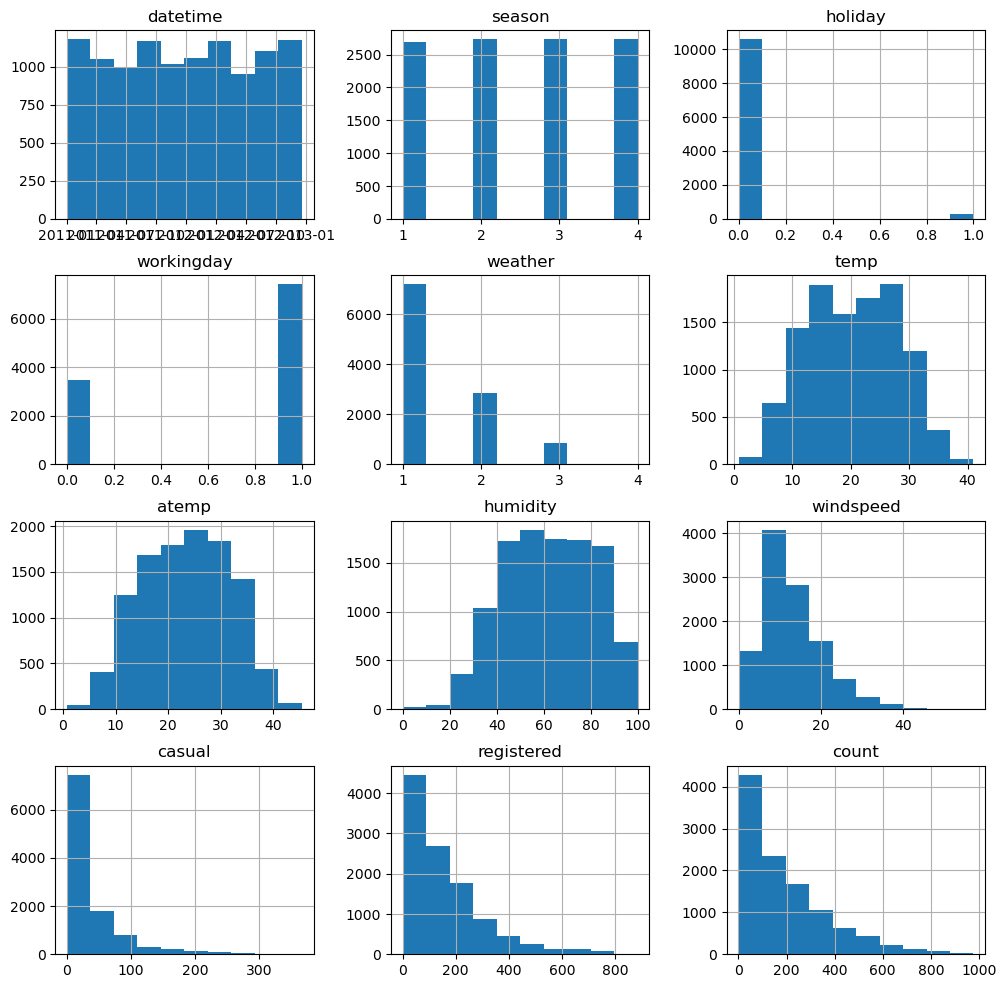

In [14]:
# Create a histogram of all features to show the distribution of each one relative to the data. This is part of the exploritory data analysis
train.hist(figsize=(12,12))

In [15]:
# create a new feature
train['hour'] = train['datetime'].dt.hour
test['hour'] = test['datetime'].dt.hour

train['day'] = train['datetime'].dt.day
test['day'] = test['datetime'].dt.day

train['month'] = train['datetime'].dt.month
test['month'] = test['datetime'].dt.month

train['year'] = train['datetime'].dt.year
test['year'] = test['datetime'].dt.year

## Make category types for these so models know they are not just numbers
* AutoGluon originally sees these as ints, but in reality they are int representations of a category.
* Setting the dtype to category will classify these as categories in AutoGluon.

In [16]:
train["season"] = train["season"].astype('category')
train["weather"] = train["weather"].astype('category')

test["season"] = test["season"].astype('category')
test["weather"] = test["weather"].astype('category')

In [17]:
# View are new feature
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,day,month,year
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,1,1,2011
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,1,1,2011
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2,1,1,2011
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3,1,1,2011
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4,1,1,2011


array([[<Axes: title={'center': 'datetime'}>,
        <Axes: title={'center': 'holiday'}>,
        <Axes: title={'center': 'workingday'}>,
        <Axes: title={'center': 'temp'}>],
       [<Axes: title={'center': 'atemp'}>,
        <Axes: title={'center': 'humidity'}>,
        <Axes: title={'center': 'windspeed'}>,
        <Axes: title={'center': 'casual'}>],
       [<Axes: title={'center': 'registered'}>,
        <Axes: title={'center': 'count'}>,
        <Axes: title={'center': 'hour'}>,
        <Axes: title={'center': 'day'}>],
       [<Axes: title={'center': 'month'}>,
        <Axes: title={'center': 'year'}>, <Axes: >, <Axes: >]],
      dtype=object)

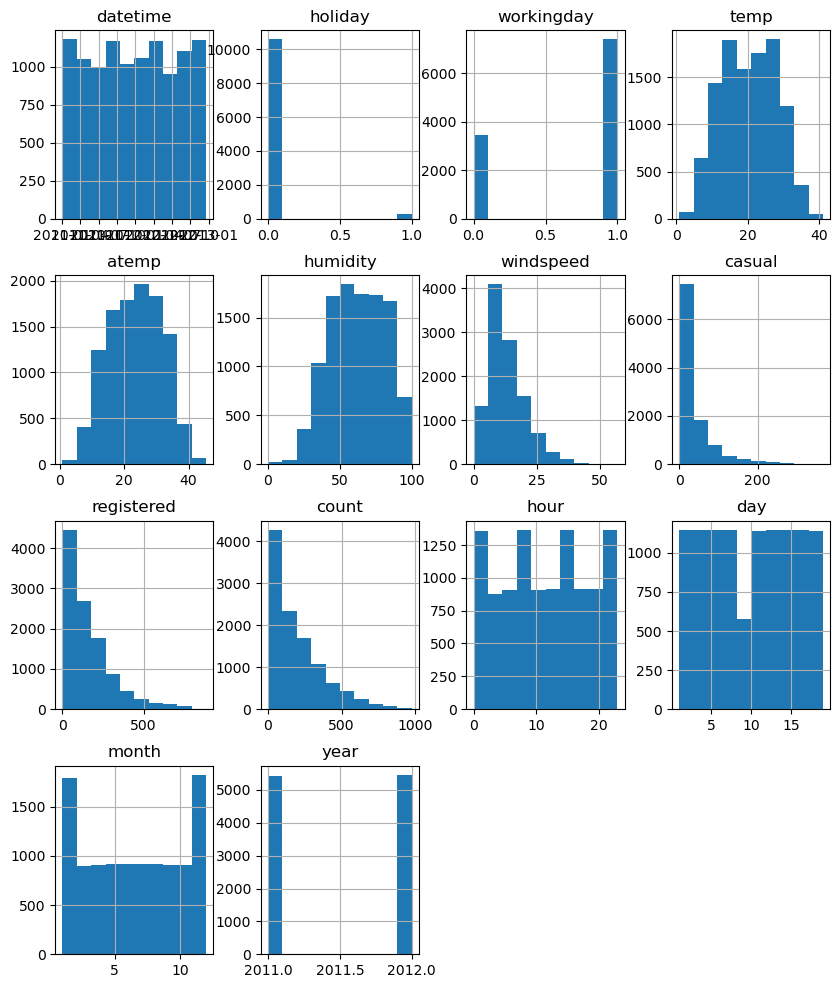

In [18]:
# View histogram of all features again now with the hour feature
train.hist(figsize=(10,12))

## Step 5: Rerun the model with the same settings as before, just with more features

In [19]:
predictor_new_features = TabularPredictor(label='count', eval_metric='root_mean_squared_error').fit(train.drop(columns=['casual' , 'registered'], axis=1), time_limit=600, presets='best_quality', auto_stack=False)

No path specified. Models will be saved in: "AutogluonModels/ag-20240510_092204"
Presets specified: ['best_quality']
/opt/conda/lib/python3.10/site-packages/autogluon/core/utils/utils.py:564: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context("mode.use_inf_as_na", True):  # treat None, NaN, INF, NINF as NA
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20240510_092204"
AutoGluon Version:  0.8.2
Python Version:     3.10.14
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Sat Mar 23 09:49:55 UTC 2024
Disk Space Avail:   3.89 GB / 5.36 GB (72.6%)
	We recommend a minimum available disk space of 10 GB, and large datasets may require more.
Train Data Rows:    10886
Train Data Columns: 13
Label Column: count
Preprocessing data ...
/opt/conda/lib/python3.10/site-packages/autogluon/core/utils/uti

[1000]	valid_set's rmse: 37.513
[2000]	valid_set's rmse: 35.8576
[3000]	valid_set's rmse: 35.5756
[4000]	valid_set's rmse: 35.4978
[5000]	valid_set's rmse: 35.4649


	-35.4344	 = Validation score   (-root_mean_squared_error)
	7.22s	 = Training   runtime
	0.78s	 = Validation runtime
Fitting model: LightGBM ... Training model for up to 590.24s of the 590.24s of remaining time.


[1000]	valid_set's rmse: 35.1998


	-35.1309	 = Validation score   (-root_mean_squared_error)
	2.04s	 = Training   runtime
	0.14s	 = Validation runtime
Fitting model: RandomForestMSE ... Training model for up to 587.82s of the 587.82s of remaining time.
	-38.7088	 = Validation score   (-root_mean_squared_error)
	15.83s	 = Training   runtime
	0.15s	 = Validation runtime
Fitting model: CatBoost ... Training model for up to 571.57s of the 571.56s of remaining time.
	-34.9418	 = Validation score   (-root_mean_squared_error)
	206.12s	 = Training   runtime
	0.03s	 = Validation runtime
Fitting model: ExtraTreesMSE ... Training model for up to 365.36s of the 365.35s of remaining time.
	-40.2636	 = Validation score   (-root_mean_squared_error)
	9.12s	 = Training   runtime
	0.18s	 = Validation runtime
Fitting model: NeuralNetFastAI ... Training model for up to 355.7s of the 355.7s of remaining time.
	-44.9124	 = Validation score   (-root_mean_squared_error)
	15.12s	 = Training   runtime
	0.03s	 = Validation runtime
Fitting model:

In [20]:
predictor_new_features.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                  model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0   WeightedEnsemble_L2  -32.234499       1.237829  328.296777                0.000504           0.334063            2       True         12
1         LightGBMLarge  -33.814780       0.115912    4.048641                0.115912           4.048641            1       True         11
2              CatBoost  -34.941760       0.033459  206.120054                0.033459         206.120054            1       True          6
3              LightGBM  -35.130905       0.139131    2.044370                0.139131           2.044370            1       True          4
4            LightGBMXT  -35.434448       0.778757    7.220258                0.778757           7.220258            1       True          3
5               XGBoost  -35.968929       0.130983    3.415101                0.130983      

/opt/conda/lib/python3.10/site-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif': 'KNNModel',
  'KNeighborsDist': 'KNNModel',
  'LightGBMXT': 'LGBModel',
  'LightGBM': 'LGBModel',
  'RandomForestMSE': 'RFModel',
  'CatBoost': 'CatBoostModel',
  'ExtraTreesMSE': 'XTModel',
  'NeuralNetFastAI': 'NNFastAiTabularModel',
  'XGBoost': 'XGBoostModel',
  'NeuralNetTorch': 'TabularNeuralNetTorchModel',
  'LightGBMLarge': 'LGBModel',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif': -109.73942190555698,
  'KNeighborsDist': -92.44208479870365,
  'LightGBMXT': -35.43444767651659,
  'LightGBM': -35.13090454282532,
  'RandomForestMSE': -38.70883793937695,
  'CatBoost': -34.94176018971623,
  'ExtraTreesMSE': -40.26356069950753,
  'NeuralNetFastAI': -44.91244970002151,
  'XGBoost': -35.96892884406599,
  'NeuralNetTorch': -38.59224026380567,
  'LightGBMLarge': -33.814779947567644,
  'WeightedEnsemble_L2': -32.234498824335645},
 'model_best': 'WeightedEnsemble_L2',
 'model_paths': {'KNeighborsUnif': ['KNeigh

In [21]:
# Remember to set all negative values to zero
predictions_new_features=predictor_new_features.predict(test)
predictions_new_features.describe()

count    6493.000000
mean      191.103500
std       170.022385
min       -11.220936
25%        47.290443
50%       152.981323
75%       283.156311
max       878.508972
Name: count, dtype: float64

There are some negative values present

In [22]:
predictions_new_features[predictions_new_features < 0] = 0

# Rechecking if any predictions are less than 0
negative_pred_count = predictions_new_features.apply(lambda x: 1 if x < 0 else 0)
pred_neg_count = (negative_pred_count == 1).sum()

# Output the count of negative predictions
print(f"No. of negative predictions: {pred_neg_count}")

# Confirm that all negative values in the predictions have been set to zero
print("All negative values in the predictions (if any) are set to zero successfully.")


No. of negative predictions: 0
All negative values in the predictions (if any) are set to zero successfully.


In [23]:
predictions_new_features.describe()

count    6493.000000
mean      191.122345
std       170.000961
min         0.000000
25%        47.290443
50%       152.981323
75%       283.156311
max       878.508972
Name: count, dtype: float64

All values set to zero

In [24]:
submission_new_features = pd.read_csv('sampleSubmission.csv', parse_dates = ['datetime'])
submission_new_features.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [25]:
# Same submitting predictions
submission_new_features["count"] = predictions_new_features
submission_new_features.to_csv("submission_new_features.csv", index=False)

In [26]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_features.csv -m "new features"

100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 484kB/s]
Successfully submitted to Bike Sharing Demand

In [27]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                        status    publicScore  privateScore  
---------------------------  -------------------  ---------------------------------  --------  -----------  ------------  
submission_new_features.csv  2024-05-10 09:28:12  new features                       complete  0.51296      0.51296       
submission.csv               2024-05-10 09:21:56  first raw submission               complete  1.86412      1.86412       
submission_new_hpo.csv       2024-05-10 08:42:32  new features with hyperparameters  complete  0.5198       0.5198        
submission_new_features.csv  2024-05-10 08:36:17  new features                       complete  0.51296      0.51296       


#### New Score of `0.512`

## Step 6: Hyper parameter optimization
* There are many options for hyper parameter optimization.
* Options are to change the AutoGluon higher level parameters or the individual model hyperparameters.
* The hyperparameters of the models themselves that are in AutoGluon. Those need the `hyperparameter` and `hyperparameter_tune_kwargs` arguments.

In [28]:
from autogluon.tabular import TabularPredictor
import autogluon.core as ag

# Define hyperparameter options for different models
gbm_options = {
    'extra_trees': True,
    'num_boost_round': ag.space.Int(lower=100, upper=800, default=100),
    'num_leaves': ag.space.Int(lower=26, upper=66, default=36),
    'ag_args': {'name_suffix': 'XT'}
}

xgb_options = {
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
    'max_depth': ag.space.Int(lower=5, upper=8, default=6),
    'n_estimators': ag.space.Int(lower=100, upper=500, default=100),
    'eta': 0.3,
    'subsample': 1,
    'colsample_bytree': 1
}

rf_options = {
    'criterion': 'squared_error',
    'ag_args': {'name_suffix': 'MSE', 'problem_types': ['regression']}
}

# Define hyperparameters dictionary for different model types
hyperparameters = {
    'GBM': gbm_options,
    'XGB': xgb_options,
    'RF': rf_options
}

# Define hyperparameter tuning settings
time_limit = 600
num_trials = 20
search_strategy = 'auto'

hyperparameter_tune_kwargs = {
    'num_trials': num_trials,
    'scheduler': 'local',
    'searcher': search_strategy
}

# Fit TabularPredictor with hyperparameter tuning
predictor_new_hpo = TabularPredictor(label='count', problem_type='regression', eval_metric='root_mean_squared_error').fit(
    train.drop(columns=['casual', 'registered'], axis=1),
    time_limit=time_limit,
    presets='best_quality',
    hyperparameters=hyperparameters,
    hyperparameter_tune_kwargs=hyperparameter_tune_kwargs,
    auto_stack=False
)


No path specified. Models will be saved in: "AutogluonModels/ag-20240510_092814"
Presets specified: ['best_quality']
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20240510_092814"
AutoGluon Version:  0.8.2
Python Version:     3.10.14
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Sat Mar 23 09:49:55 UTC 2024
Disk Space Avail:   3.34 GB / 5.36 GB (62.4%)
	We recommend a minimum available disk space of 10 GB, and large datasets may require more.
Train Data Rows:    10886
Train Data Columns: 13
Label Column: count
Preprocessing data ...
/opt/conda/lib/python3.10/site-packages/autogluon/tabular/learner/default_learner.py:215: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context("mode.use_inf_as_na", True):  # treat None, NaN, INF, NINF as NA
Using Feature Generators to preprocess the data .

  0%|          | 0/20 [00:00<?, ?it/s]

Fitted model: LightGBMXT/T1 ...
	-72.6017	 = Validation score   (-root_mean_squared_error)
	0.43s	 = Training   runtime
	0.02s	 = Validation runtime
Fitted model: LightGBMXT/T2 ...
	-42.7151	 = Validation score   (-root_mean_squared_error)
	0.89s	 = Training   runtime
	0.1s	 = Validation runtime
Fitted model: LightGBMXT/T3 ...
	-87.2145	 = Validation score   (-root_mean_squared_error)
	0.56s	 = Training   runtime
	0.04s	 = Validation runtime
Fitted model: LightGBMXT/T4 ...
	-50.0319	 = Validation score   (-root_mean_squared_error)
	1.69s	 = Training   runtime
	0.26s	 = Validation runtime
Fitted model: LightGBMXT/T5 ...
	-89.9385	 = Validation score   (-root_mean_squared_error)
	0.54s	 = Training   runtime
	0.04s	 = Validation runtime
Fitted model: LightGBMXT/T6 ...
	-55.7834	 = Validation score   (-root_mean_squared_error)
	1.24s	 = Training   runtime
	0.13s	 = Validation runtime
Fitted model: LightGBMXT/T7 ...
	-38.7765	 = Validation score   (-root_mean_squared_error)
	1.84s	 = Traini

  0%|          | 0/20 [00:00<?, ?it/s]

Fitted model: XGBoost/T1 ...
	-40.6571	 = Validation score   (-root_mean_squared_error)
	0.5s	 = Training   runtime
	0.02s	 = Validation runtime
Fitted model: XGBoost/T2 ...
	-38.9785	 = Validation score   (-root_mean_squared_error)
	2.78s	 = Training   runtime
	0.09s	 = Validation runtime
Fitted model: XGBoost/T3 ...
	-36.974	 = Validation score   (-root_mean_squared_error)
	1.7s	 = Training   runtime
	0.1s	 = Validation runtime
Fitted model: XGBoost/T4 ...
	-42.2421	 = Validation score   (-root_mean_squared_error)
	0.6s	 = Training   runtime
	0.03s	 = Validation runtime
Fitted model: XGBoost/T5 ...
	-42.2909	 = Validation score   (-root_mean_squared_error)
	1.62s	 = Training   runtime
	0.1s	 = Validation runtime
Fitted model: XGBoost/T6 ...
	-37.929	 = Validation score   (-root_mean_squared_error)
	1.26s	 = Training   runtime
	0.08s	 = Validation runtime
Fitted model: XGBoost/T7 ...
	-40.5449	 = Validation score   (-root_mean_squared_error)
	1.13s	 = Training   runtime
	0.04s	 = Vali

In [29]:
predictor_new_hpo.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                  model  score_val  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0   WeightedEnsemble_L2 -34.719962       1.462539  24.838631                0.000576           0.373870            2       True         42
1            XGBoost/T8 -36.415551       0.106307   2.479096                0.106307           2.479096            1       True         29
2           XGBoost/T10 -36.828652       0.074001   1.570238                0.074001           1.570238            1       True         31
3           XGBoost/T12 -36.963639       0.117293   2.386318                0.117293           2.386318            1       True         33
4            XGBoost/T3 -36.973981       0.102765   1.695829                0.102765           1.695829            1       True         24
5           XGBoost/T18 -37.394028       0.040558   0.906019                0.040558           0.906019 

/opt/conda/lib/python3.10/site-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'LightGBMXT/T1': 'LGBModel',
  'LightGBMXT/T2': 'LGBModel',
  'LightGBMXT/T3': 'LGBModel',
  'LightGBMXT/T4': 'LGBModel',
  'LightGBMXT/T5': 'LGBModel',
  'LightGBMXT/T6': 'LGBModel',
  'LightGBMXT/T7': 'LGBModel',
  'LightGBMXT/T8': 'LGBModel',
  'LightGBMXT/T9': 'LGBModel',
  'LightGBMXT/T10': 'LGBModel',
  'LightGBMXT/T11': 'LGBModel',
  'LightGBMXT/T12': 'LGBModel',
  'LightGBMXT/T13': 'LGBModel',
  'LightGBMXT/T14': 'LGBModel',
  'LightGBMXT/T15': 'LGBModel',
  'LightGBMXT/T16': 'LGBModel',
  'LightGBMXT/T17': 'LGBModel',
  'LightGBMXT/T18': 'LGBModel',
  'LightGBMXT/T19': 'LGBModel',
  'LightGBMXT/T20': 'LGBModel',
  'RandomForestMSE': 'RFModel',
  'XGBoost/T1': 'XGBoostModel',
  'XGBoost/T2': 'XGBoostModel',
  'XGBoost/T3': 'XGBoostModel',
  'XGBoost/T4': 'XGBoostModel',
  'XGBoost/T5': 'XGBoostModel',
  'XGBoost/T6': 'XGBoostModel',
  'XGBoost/T7': 'XGBoostModel',
  'XGBoost/T8': 'XGBoostModel',
  'XGBoost/T9': 'XGBoostModel',
  'XGBoost/T10': 'XGBoostModel',
 

In [30]:
# Remember to set all negative values to zero
predictions_new_hpo=predictor_new_hpo.predict(test)
predictions_new_hpo.describe()

count    6493.000000
mean      193.761246
std       173.347610
min       -15.448641
25%        49.426212
50%       153.032562
75%       287.788330
max       910.283569
Name: count, dtype: float64

In [31]:
# Remember to set all negative values to zero
predictions_new_hpo[predictions_new_hpo < 0] = 0

# Rechecking if any predictions are less than 0
negative_pred_count_hpo = predictions_new_hpo.apply(lambda x: 1 if x < 0 else 0)
pred_neg_count_hpo = (negative_pred_count_hpo == 1).sum()

# Output the count of negative predictions
print(f"No. of negative predictions: {pred_neg_count_hpo}")

# Confirm that all negative values in the predictions have been set to zero
print("All negative values in the predictions (if any) are set to zero successfully.")


No. of negative predictions: 0
All negative values in the predictions (if any) are set to zero successfully.


In [32]:
predictions_new_hpo.describe()

count    6493.000000
mean      193.794052
std       173.310364
min         0.000000
25%        49.426212
50%       153.032562
75%       287.788330
max       910.283569
Name: count, dtype: float64

In [33]:
submission_new_hpo = pd.read_csv('sampleSubmission.csv', parse_dates = ['datetime'])
submission_new_hpo.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [34]:
# Same submitting predictions
submission_new_hpo["count"] = predictions_new_hpo
submission_new_hpo.to_csv("submission_new_hpo.csv", index=False)

In [35]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo.csv -m "new features with hyperparameters"

100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 721kB/s]
Successfully submitted to Bike Sharing Demand

In [36]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                        status    publicScore  privateScore  
---------------------------  -------------------  ---------------------------------  --------  -----------  ------------  
submission_new_hpo.csv       2024-05-10 09:29:43  new features with hyperparameters  complete  0.5198       0.5198        
submission_new_features.csv  2024-05-10 09:28:12  new features                       complete  0.51296      0.51296       
submission.csv               2024-05-10 09:21:56  first raw submission               complete  1.86412      1.86412       
submission_new_hpo.csv       2024-05-10 08:42:32  new features with hyperparameters  complete  0.5198       0.5198        


#### New Score of `0.5198`

## Step 7: Write a Report
### Refer to the markdown file for the full report
### Creating plots and table for report

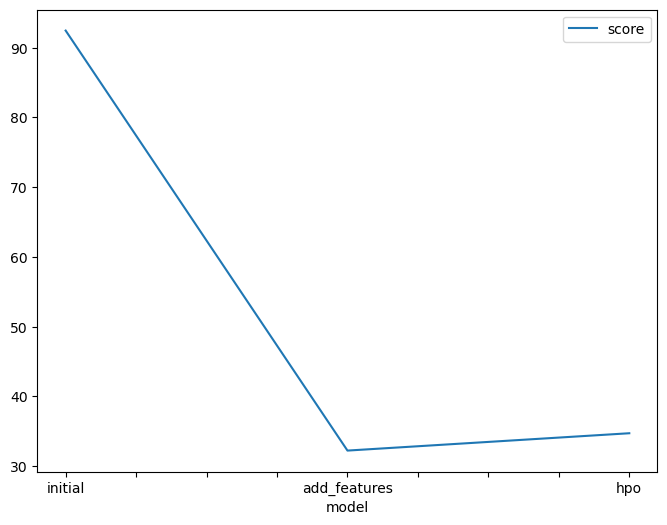

In [37]:
# Taking the top model score from each training run and creating a line plot to show improvement
# You can create these in the notebook and save them to PNG or use some other tool (e.g. google sheets, excel)
fig = pd.DataFrame(
    {
        "model": ["initial", "add_features", "hpo"],
        "score": [92.442085, 32.234499 ,34.719962 ]
    }
).plot(x="model", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_train_score.png')

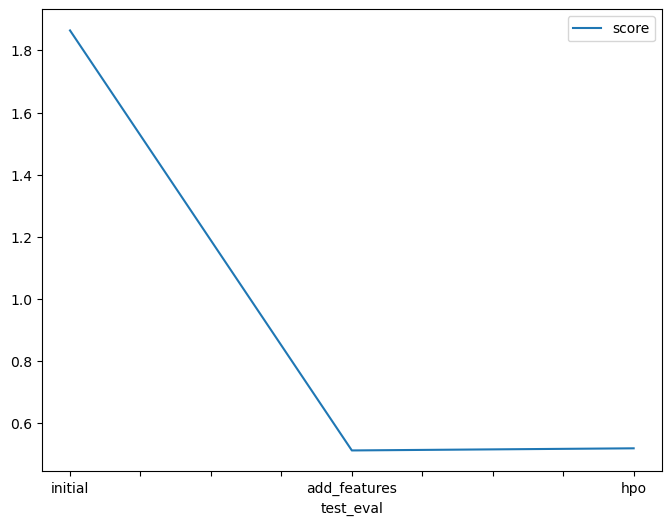

In [38]:
# Take the 3 kaggle scores and creating a line plot to show improvement
fig = pd.DataFrame(
    {
        "test_eval": ["initial", "add_features", "hpo"],
        "score": [1.86412,0.51296 , 0.5198]
    }
).plot(x="test_eval", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_test_score.png')

### Hyperparameter table

In [39]:
# The 3 hyperparameters we tuned with the kaggle score as the result
pd.DataFrame({
    "model": ["initial", "add_features", "hpo"],
    "hpo1": ["default_value", "default_value", "GBM: {(num_boost_round: lower=100, upper=800), (num_leave: lower=26, upper=66)}"],
    "hpo2": ["default_value", "default_value", "XGB: {(max_depth: lower=5, upper=8), (n_estimators: lower=100, upper=500), (eta=0.3), (subsample: 1), (colsample_bytree:1)"],
    "hpo3": ["default_value", "default_value", "rf: (criterion: squared_error) "],
    "score": [1.86412, 0.51296, 0.5198]
})

,model,hpo1,hpo2,hpo3,score
0,initial,default_value,default_value,default_value,1.86412
1,add_features,default_value,default_value,default_value,0.51296
2,hpo,"GBM: {(num_boost_round: lower=100, upper=800), (num_leave: lower=26, upper=66)}","XGB: {(max_depth: lower=5, upper=8), (n_estimators: lower=100, upper=500), (eta=0.3), (subsample: 1), (colsample_bytree:1)",rf: (criterion: squared_error),0.51980
